Epoch 0 Training loss 0.7134920351112946 Validation Loss : 0.6859114855527878
Epoch 1 Training loss 0.6718515255783177 Validation Loss : 0.6436089456081391
Epoch 2 Training loss 0.636411427697049 Validation Loss : 0.6059735983610153
Epoch 3 Training loss 0.6083627916589568 Validation Loss : 0.5769618362188339
Epoch 4 Training loss 0.5791039312187629 Validation Loss : 0.5501256912946701
Epoch 5 Training loss 0.5541546133500111 Validation Loss : 0.5211204335093498
Epoch 6 Training loss 0.5310382394096519 Validation Loss : 0.4927047371864319
Epoch 7 Training loss 0.5079757748525354 Validation Loss : 0.47367159724235536
Epoch 8 Training loss 0.4903440147261076 Validation Loss : 0.44854056239128115
Epoch 9 Training loss 0.4734305384792859 Validation Loss : 0.43058444559574127
Epoch 10 Training loss 0.4581128864348689 Validation Loss : 0.4130000382661819
Epoch 11 Training loss 0.44216136879558804 Validation Loss : 0.39976649135351183
Epoch 12 Training loss 0.4279512321647209 Validation Loss 

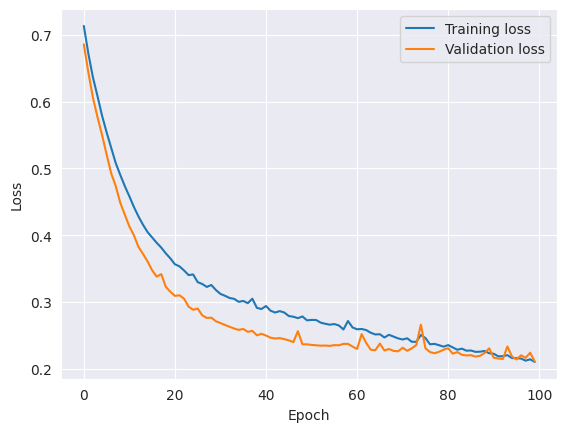

Finished Training


In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim



class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        x = torch.tensor(row[0:-1].values, dtype=torch.float32)
        y = torch.tensor([row[-1], 1 - row[-1]], dtype=torch.float32)
        

        return x, y

# Load the training dataset
train_dataset = CustomDataset(csv_file='/content/drive/MyDrive/YapaySinirAglari/cure_the_princess_train.csv')
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Load the testing dataset
test_dataset = CustomDataset(csv_file='/content/drive/MyDrive/YapaySinirAglari/cure_the_princess_test.csv')
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load the validation dataset
val_dataset = CustomDataset(csv_file='/content/drive/MyDrive/YapaySinirAglari/cure_the_princess_validation.csv')
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)





class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(in_features=13, out_features=50) 
        self.layer2 = nn.Linear(in_features=50, out_features=20)
        self.layer3 = nn.Linear(in_features=20, out_features=2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x



# Set the seed value for random, numpy, and torch
seed_value = 190401012
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)



# Instantiate the model
model = MyNeuralNetwork()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#train the model
list_train_loss, list_val_loss = [], []
num_epochs = 100

for epoch in range(num_epochs):

    # Set the model to training mode
    model.train()

    # training loop
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_dataloader:

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_count += 1.0
        train_loss += loss.item()
      

    val_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    #model.train()

    # calculate metrics
    train_loss /= train_count
    val_loss /= len(val_dataloader)

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(val_loss)



sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished Training')


In [3]:
# Put the model in evaluation mode
model.eval()

# Initialize the variables for the metrics
tp = 0  # true positives
tn = 0  # true negatives
fp = 0  # false positives
fn = 0  # false negatives

# Iterate over the test data
for inputs, labels in test_dataloader:
    # Make predictions using the model
    outputs = model(inputs)
    predictions = torch.argmax(outputs, dim=1)

    # Compute the metrics
    tp += torch.sum((predictions == 1) & (labels[:, 1] == 1)).item()
    tn += torch.sum((predictions == 0) & (labels[:, 0] == 1)).item()
    fp += torch.sum((predictions == 1) & (labels[:, 0] == 1)).item()
    fn += torch.sum((predictions == 0) & (labels[:, 1] == 1)).item()

# Compute the metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1_score))

Accuracy: 0.9106
Precision: 0.9049
Recall: 0.9167
F1 Score: 0.9107
